In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dfraw = pd.read_csv('../data/finalKarachiDataMerged.csv')

dfgp = dfraw.groupby(['SerialNumber', 'Name', 'City'])

for i,k in dfgp:
    print(i)

dfc = dfraw.drop_duplicates()
assert len(dfc) == len(dfraw)
len(dfc)

('4ypxth4', 'Defence Housing Authority', 'Karachi')
('997gv7h', 'northkarachi', 'Karachi')
('a67pmak', 'landhi', 'Karachi')
('aj9xpaw', 'Korangi', 'Karachi')
('ajgclt7', 'Korangi (J-Area)', 'Karachi')
('cpguxuc', 'saddar', 'Karachi')
('g6gs9ls', 'Hyderi Market', 'Karachi')
('lllm4gm', 'bahadurabad', 'Karachi')
('rjpamt6', 'karachi - industrial', 'Karachi')
('tj4gawm', 'shershah', 'Karachi')
('tlxa6x7', 'Liaquatabad', 'Karachi')
('yggpgpl', 'Civic Center, Korangi', 'Karachi')


64889

In [7]:
print(dfc.columns)
dfc.head()

Index(['SerialNumber', 'City', 'Name', 'Datetime', 'PM2.5', 'USAQI', 'CO2',
       'Temperature', 'RelativeHumidity', 'weekday', 'hour', 'month', 'year',
       'dayofmonth', 'tmpc', 'relh', 'drct', 'sped', 'vsby'],
      dtype='object')


,SerialNumber,City,Name,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,weekday,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
0,rjpamt6,Karachi,karachi - industrial,2017-01-01 00:00:00,177.0,227,429.0,26.0,58.0,6,0,1,2017,1,13.00,68.4200,10.0,4.6000,1.3950
1,4ypxth4,Karachi,Defence Housing Authority,2017-01-01 00:00:00,244.0,294,447.0,23.0,67.0,6,0,1,2017,1,13.00,68.4200,10.0,4.6000,1.3950
2,rjpamt6,Karachi,karachi - industrial,2017-01-01 01:00:00,178.0,228,435.0,26.0,56.0,6,1,1,2017,1,12.50,73.2250,10.0,5.1750,1.3950
3,4ypxth4,Karachi,Defence Housing Authority,2017-01-01 01:00:00,218.0,268,449.0,22.0,60.0,6,1,1,2017,1,12.50,73.2250,10.0,5.1750,1.3950
4,rjpamt6,Karachi,karachi - industrial,2017-01-01 02:00:00,182.0,232,437.0,26.0,53.0,6,2,1,2017,1,10.25,80.2075,5.0,2.5875,1.0075


In [12]:
drop_columns = ['tmpc', 'relh']

df = dfc.drop(drop_columns, axis = 1)

In [13]:
df.isna().mean() * 100

SerialNumber        0.000000
City                0.000000
Name                0.000000
Datetime            0.000000
PM2.5               0.000000
USAQI               0.000000
CO2                 0.000000
Temperature         0.000000
RelativeHumidity    0.000000
weekday             0.000000
hour                0.000000
month               0.000000
year                0.000000
dayofmonth          0.000000
drct                0.288184
sped                0.288184
vsby                0.288184
dtype: float64

In [14]:
df = df.dropna()
len(df)

64702

In [15]:
df['Datetime'] = pd.to_datetime(df.Datetime)

In [18]:
dfs = df.sort_values(['Datetime'])
dfs = dfs.reset_index(drop = True)

dfs.head()

,SerialNumber,City,Name,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,weekday,hour,month,year,dayofmonth,drct,sped,vsby
0,rjpamt6,Karachi,karachi - industrial,2017-01-01 00:00:00,177.0,227,429.0,26.0,58.0,6,0,1,2017,1,10.0,4.6000,1.3950
1,4ypxth4,Karachi,Defence Housing Authority,2017-01-01 00:00:00,244.0,294,447.0,23.0,67.0,6,0,1,2017,1,10.0,4.6000,1.3950
2,rjpamt6,Karachi,karachi - industrial,2017-01-01 01:00:00,178.0,228,435.0,26.0,56.0,6,1,1,2017,1,10.0,5.1750,1.3950
3,4ypxth4,Karachi,Defence Housing Authority,2017-01-01 01:00:00,218.0,268,449.0,22.0,60.0,6,1,1,2017,1,10.0,5.1750,1.3950
4,rjpamt6,Karachi,karachi - industrial,2017-01-01 02:00:00,182.0,232,437.0,26.0,53.0,6,2,1,2017,1,5.0,2.5875,1.0075


In [19]:
def myPartSerial(dfs):
    dfslice = dfs[:]
    lis = []
        
    dfdiff = dfslice.Datetime.diff()
    dfdiff.iloc[0] = dfdiff.iloc[1]
    dfdiff2 = dfdiff > pd.Timedelta('1 hour')
    dfdiff3 = dfdiff2.cumsum()    
    
    for j,k in dfslice.groupby(dfdiff3):
        if len(k) > 0:
            d = k.iloc[:]
            lis.append( d )
    
    return lis

In [20]:
dfs.tail()

,SerialNumber,City,Name,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,weekday,hour,month,year,dayofmonth,drct,sped,vsby
64697,aj9xpaw,Karachi,Korangi,2018-08-31 23:00:00,7.0,29,596.0,27.0,65.0,4,23,8,2018,31,174.0,8.28,2.986
64698,yggpgpl,Karachi,"Civic Center, Korangi",2018-08-31 23:00:00,41.0,114,409.0,25.0,93.0,4,23,8,2018,31,174.0,8.28,2.986
64699,rjpamt6,Karachi,karachi - industrial,2018-08-31 23:00:00,4.0,17,419.0,27.0,89.0,4,23,8,2018,31,174.0,8.28,2.986
64700,g6gs9ls,Karachi,Hyderi Market,2018-08-31 23:00:00,32.0,93,416.0,27.0,86.0,4,23,8,2018,31,174.0,8.28,2.986
64701,lllm4gm,Karachi,bahadurabad,2018-08-31 23:00:00,26.0,80,420.0,27.0,84.0,4,23,8,2018,31,174.0,8.28,2.986


In [23]:
dfs.Name.unique()

array(['karachi - industrial', 'Defence Housing Authority', 'Korangi',
       'northkarachi', 'landhi', 'shershah', 'Korangi (J-Area)',
       'bahadurabad', 'Hyderi Market', 'saddar', 'Civic Center, Korangi',
       'Liaquatabad'], dtype=object)

In [44]:
dfk_s = dfs.copy()

#dfk_s = dfk_s[dfk_s.Name != "northkarachi"]
dfk_s.City.unique()

array(['Karachi'], dtype=object)

,Defence Housing Authority,northkarachi,landhi,Korangi,Korangi (J-Area),saddar,Hyderi Market,bahadurabad,karachi - industrial,shershah,Liaquatabad,"Civic Center, Korangi"
Defence Housing Authority,1.000000,0.368717,0.604603,0.775821,0.607160,0.736255,0.679841,0.626718,0.783734,0.634561,0.642795,0.262718
northkarachi,0.368717,1.000000,0.405624,0.450740,0.381205,0.358098,0.332697,0.268702,0.372741,0.289022,0.294052,0.412107
landhi,0.604603,0.405624,1.000000,0.606258,0.675569,0.530844,0.576518,0.547796,0.645548,0.425823,0.608102,0.455126
Korangi,0.775821,0.450740,0.606258,1.000000,0.640097,0.499151,0.564595,0.305374,0.784736,0.445482,0.386992,0.244939
Korangi (J-Area),0.607160,0.381205,0.675569,0.640097,1.000000,0.502231,0.517705,0.602522,0.629503,0.476260,0.543727,0.716347
saddar,0.736255,0.358098,0.530844,0.499151,0.502231,1.000000,0.546412,0.518104,0.561844,0.625322,0.509635,0.396474
Hyderi Market,0.679841,0.332697,0.576518,0.564595,0.517705,0.546412,1.000000,0.555058,0.625643,0.447737,0.531552,0.373635
bahadurabad,0.626718,0.268702,0.547796,0.305374,0.602522,0.518104,0.555058,1.000000,0.437852,0.315269,0.732099,0.246470
karachi - industrial,0.783734,0.372741,0.645548,0.784736,0.629503,0.561844,0.625643,0.437852,1.000000,0.531142,0.602878,0.172258
shershah,0.634561,0.289022,0.425823,0.445482,0.476260,0.625322,0.447737,0.315269,0.531142,1.000000,0.394210,0.208633


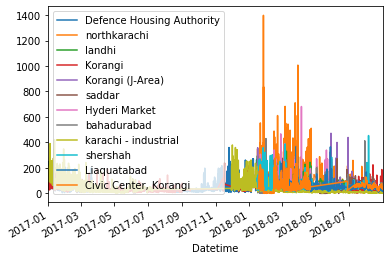

In [45]:
ax = plt.gca()
lis = []
names = []

for i,k in dfk_s.groupby('SerialNumber'):
    k.plot('Datetime', 'PM2.5', label = k.Name.iloc[0], ax = ax)
    lis.append(k.set_index('Datetime')['PM2.5'])
    names.append(k.Name.iloc[0])

lis = pd.concat(lis, axis = 1)
lis.columns = names
lis.corr()

In [34]:
print(lis)

lis2 = lis.mean(axis = 1)

print(lis2.head(20))

r = myPartSerial(lis2.reset_index())

for i in r:
    print(i.shape)

                     Defence Housing Authority  northkarachi  landhi  Korangi  \
Datetime                                                                        
2017-01-01 00:00:00                      244.0           NaN     NaN      NaN   
2017-01-01 01:00:00                      218.0           NaN     NaN      NaN   
2017-01-01 02:00:00                      209.0           NaN     NaN      NaN   
2017-01-01 03:00:00                      208.0           NaN     NaN     57.0   
2017-01-01 04:00:00                      194.0           NaN     NaN     50.0   
...                                        ...           ...     ...      ...   
2018-08-31 19:00:00                        NaN           NaN     NaN     10.0   
2018-08-31 20:00:00                        NaN           NaN     NaN      9.0   
2018-08-31 21:00:00                        NaN           NaN     NaN      8.0   
2018-08-31 22:00:00                        NaN           NaN     NaN      7.0   
2018-08-31 23:00:00         

In [35]:
r2 = pd.concat(r)
print(r2.shape)

(14453, 2)


In [36]:
time_series = pd.date_range(start = r2.Datetime.iloc[0], end = r2.Datetime.iloc[-1], freq = '1H')

checkdf = time_series.to_frame().drop(0, axis = 1)
checkdf = pd.concat([checkdf, r2.set_index('Datetime')], axis = 1)

print(checkdf.head(25))

checkdf.tail(25)

                              0
2017-01-01 00:00:00  210.500000
2017-01-01 01:00:00  198.000000
2017-01-01 02:00:00  195.500000
2017-01-01 03:00:00  144.666667
2017-01-01 04:00:00  133.666667
2017-01-01 05:00:00  142.000000
2017-01-01 06:00:00  157.333333
2017-01-01 07:00:00  168.333333
2017-01-01 08:00:00  173.000000
2017-01-01 09:00:00  176.666667
2017-01-01 10:00:00  166.000000
2017-01-01 11:00:00  154.000000
2017-01-01 12:00:00  132.333333
2017-01-01 13:00:00  124.000000
2017-01-01 14:00:00   98.000000
2017-01-01 15:00:00   80.333333
2017-01-01 16:00:00   76.333333
2017-01-01 17:00:00   81.000000
2017-01-01 18:00:00  101.333333
2017-01-01 19:00:00  103.000000
2017-01-01 20:00:00  104.333333
2017-01-01 21:00:00  111.000000
2017-01-01 22:00:00  122.666667
2017-01-01 23:00:00  130.666667
2017-01-02 00:00:00  129.000000


,0
2018-08-30 23:00:00,23.428571
2018-08-31 00:00:00,21.571429
2018-08-31 01:00:00,19.714286
2018-08-31 02:00:00,19.428571
2018-08-31 03:00:00,17.714286
2018-08-31 04:00:00,17.000000
2018-08-31 05:00:00,17.142857
2018-08-31 06:00:00,19.714286
2018-08-31 07:00:00,23.285714
2018-08-31 08:00:00,23.714286


In [66]:
def lookAtMissing(checkdf):

    col = checkdf.columns[0]
    sumi = checkdf[col].notna().cumsum()

    checkdf2 = checkdf.copy()
    checkdf2['cumsum'] = sumi

    gp23 = checkdf2[checkdf2[col].isna()].groupby('cumsum')
    for k,i in gp23:
        print(i.shape)

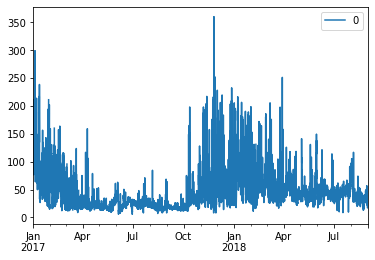

In [67]:
checkdf.plot()
plt.show()

In [68]:
lookAtMissing(checkdf)

(2, 2)
(2, 2)
(2, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(2, 2)
(1, 2)
(1, 2)
(3, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(3, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(8, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(12, 2)
(2, 2)
(1, 2)
(2, 2)
(1, 2)
(2, 2)
(2, 2)
(1, 2)
(1, 2)
(1, 2)
(2, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(2, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(4, 2)
(5, 2)
(7, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(2, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(2, 2)
(1, 2)


In [73]:
new = dfk_s.groupby('Datetime').mean()

In [85]:
time_series = pd.date_range(start = dfk_s.Datetime.iloc[0], end = dfk_s.Datetime.iloc[-1], freq = '1H')

new_df = time_series.to_frame().drop(0, axis = 1)

new_df = pd.concat([new_df, new], axis = 1)

new_df

,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,weekday,hour,month,year,dayofmonth,drct,sped,vsby
2017-01-01 00:00:00,210.500000,260.500000,438.000000,24.500000,62.500000,6.0,0.0,1.0,2017.0,1.0,10.000000,4.600000,1.395000
2017-01-01 01:00:00,198.000000,248.000000,442.000000,24.000000,58.000000,6.0,1.0,1.0,2017.0,1.0,10.000000,5.175000,1.395000
2017-01-01 02:00:00,195.500000,245.500000,436.500000,24.000000,54.000000,6.0,2.0,1.0,2017.0,1.0,5.000000,2.587500,1.007500
2017-01-01 03:00:00,144.666667,209.666667,425.666667,22.333333,56.000000,6.0,3.0,1.0,2017.0,1.0,0.000000,0.000000,1.120000
2017-01-01 04:00:00,133.666667,196.000000,416.000000,22.333333,53.666667,6.0,4.0,1.0,2017.0,1.0,5.000000,2.300000,1.177500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,26.571429,79.142857,506.000000,26.857143,80.571429,4.0,19.0,8.0,2018.0,31.0,150.000000,7.762500,2.800000
2018-08-31 20:00:00,26.571429,78.571429,475.428571,26.857143,82.000000,4.0,20.0,8.0,2018.0,31.0,201.250000,8.768750,2.955000
2018-08-31 21:00:00,26.000000,76.857143,457.714286,26.857143,82.142857,4.0,21.0,8.0,2018.0,31.0,196.666667,7.283333,3.006667
2018-08-31 22:00:00,25.714286,75.857143,447.000000,26.857143,83.285714,4.0,22.0,8.0,2018.0,31.0,174.285714,7.064286,3.021429


In [83]:
lookAtMissing(new_df)

(2, 14)
(2, 14)
(2, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(2, 14)
(1, 14)
(1, 14)
(3, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(3, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(8, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(12, 14)
(2, 14)
(1, 14)
(2, 14)
(1, 14)
(2, 14)
(2, 14)
(1, 14)
(1, 14)
(1, 14)
(2, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(2, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(4, 14)
(5, 14)
(7, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(2, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(2, 14)
(1, 14)


In [110]:
new_new_df = new_df.copy()

random_col = new_new_df.columns[0]

assert new_new_df.iloc[:24].isna().sum().sum() == 0
assert new_new_df.iloc[-24:].isna().sum().sum() == 0

for i in range(24, len(new_new_df) - 24):
    if new_new_df.iloc[i].isna().sum() > 0:
        above = new_new_df.iloc[i - 24]
        below = new_new_df.iloc[i + 24]
        if above.isna().sum() != 0:
            avg = below.copy()
        elif below.isna().sum() != 0:
            avg = above.copy()
        else:
            avg = (above + below) / 2
        assert avg.isna().sum() == 0
        
        new_new_df.iloc[i] = above
            
new_new_df.isna().sum()

PM2.5               0
USAQI               0
CO2                 0
Temperature         0
RelativeHumidity    0
weekday             0
hour                0
month               0
year                0
dayofmonth          0
drct                0
sped                0
vsby                0
dtype: int64